In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np

from scipy import stats
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, roc_curve, auc, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV, train_test_split

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn import svm
from sklearn.svm import LinearSVC

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
path = '/content/drive/MyDrive/EE8603/LiverPatientDataset.csv'

df = pd.read_csv(path, encoding='unicode_escape')

df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


array([[<Axes: xlabel='Age of the patient', ylabel='Age of the patient'>,
        <Axes: xlabel='Gender of the patient', ylabel='Age of the patient'>,
        <Axes: xlabel='Total Bilirubin', ylabel='Age of the patient'>,
        <Axes: xlabel='Direct Bilirubin', ylabel='Age of the patient'>,
        <Axes: xlabel='\xa0Alkphos Alkaline Phosphotase', ylabel='Age of the patient'>,
        <Axes: xlabel='\xa0Sgpt Alamine Aminotransferase', ylabel='Age of the patient'>,
        <Axes: xlabel='Sgot Aspartate Aminotransferase', ylabel='Age of the patient'>,
        <Axes: xlabel='Total Protiens', ylabel='Age of the patient'>,
        <Axes: xlabel='\xa0ALB Albumin', ylabel='Age of the patient'>,
        <Axes: xlabel='A/G Ratio Albumin and Globulin Ratio', ylabel='Age of the patient'>],
       [<Axes: xlabel='Age of the patient', ylabel='Gender of the patient'>,
        <Axes: xlabel='Gender of the patient', ylabel='Gender of the patient'>,
        <Axes: xlabel='Total Bilirubin', ylabel='Ge

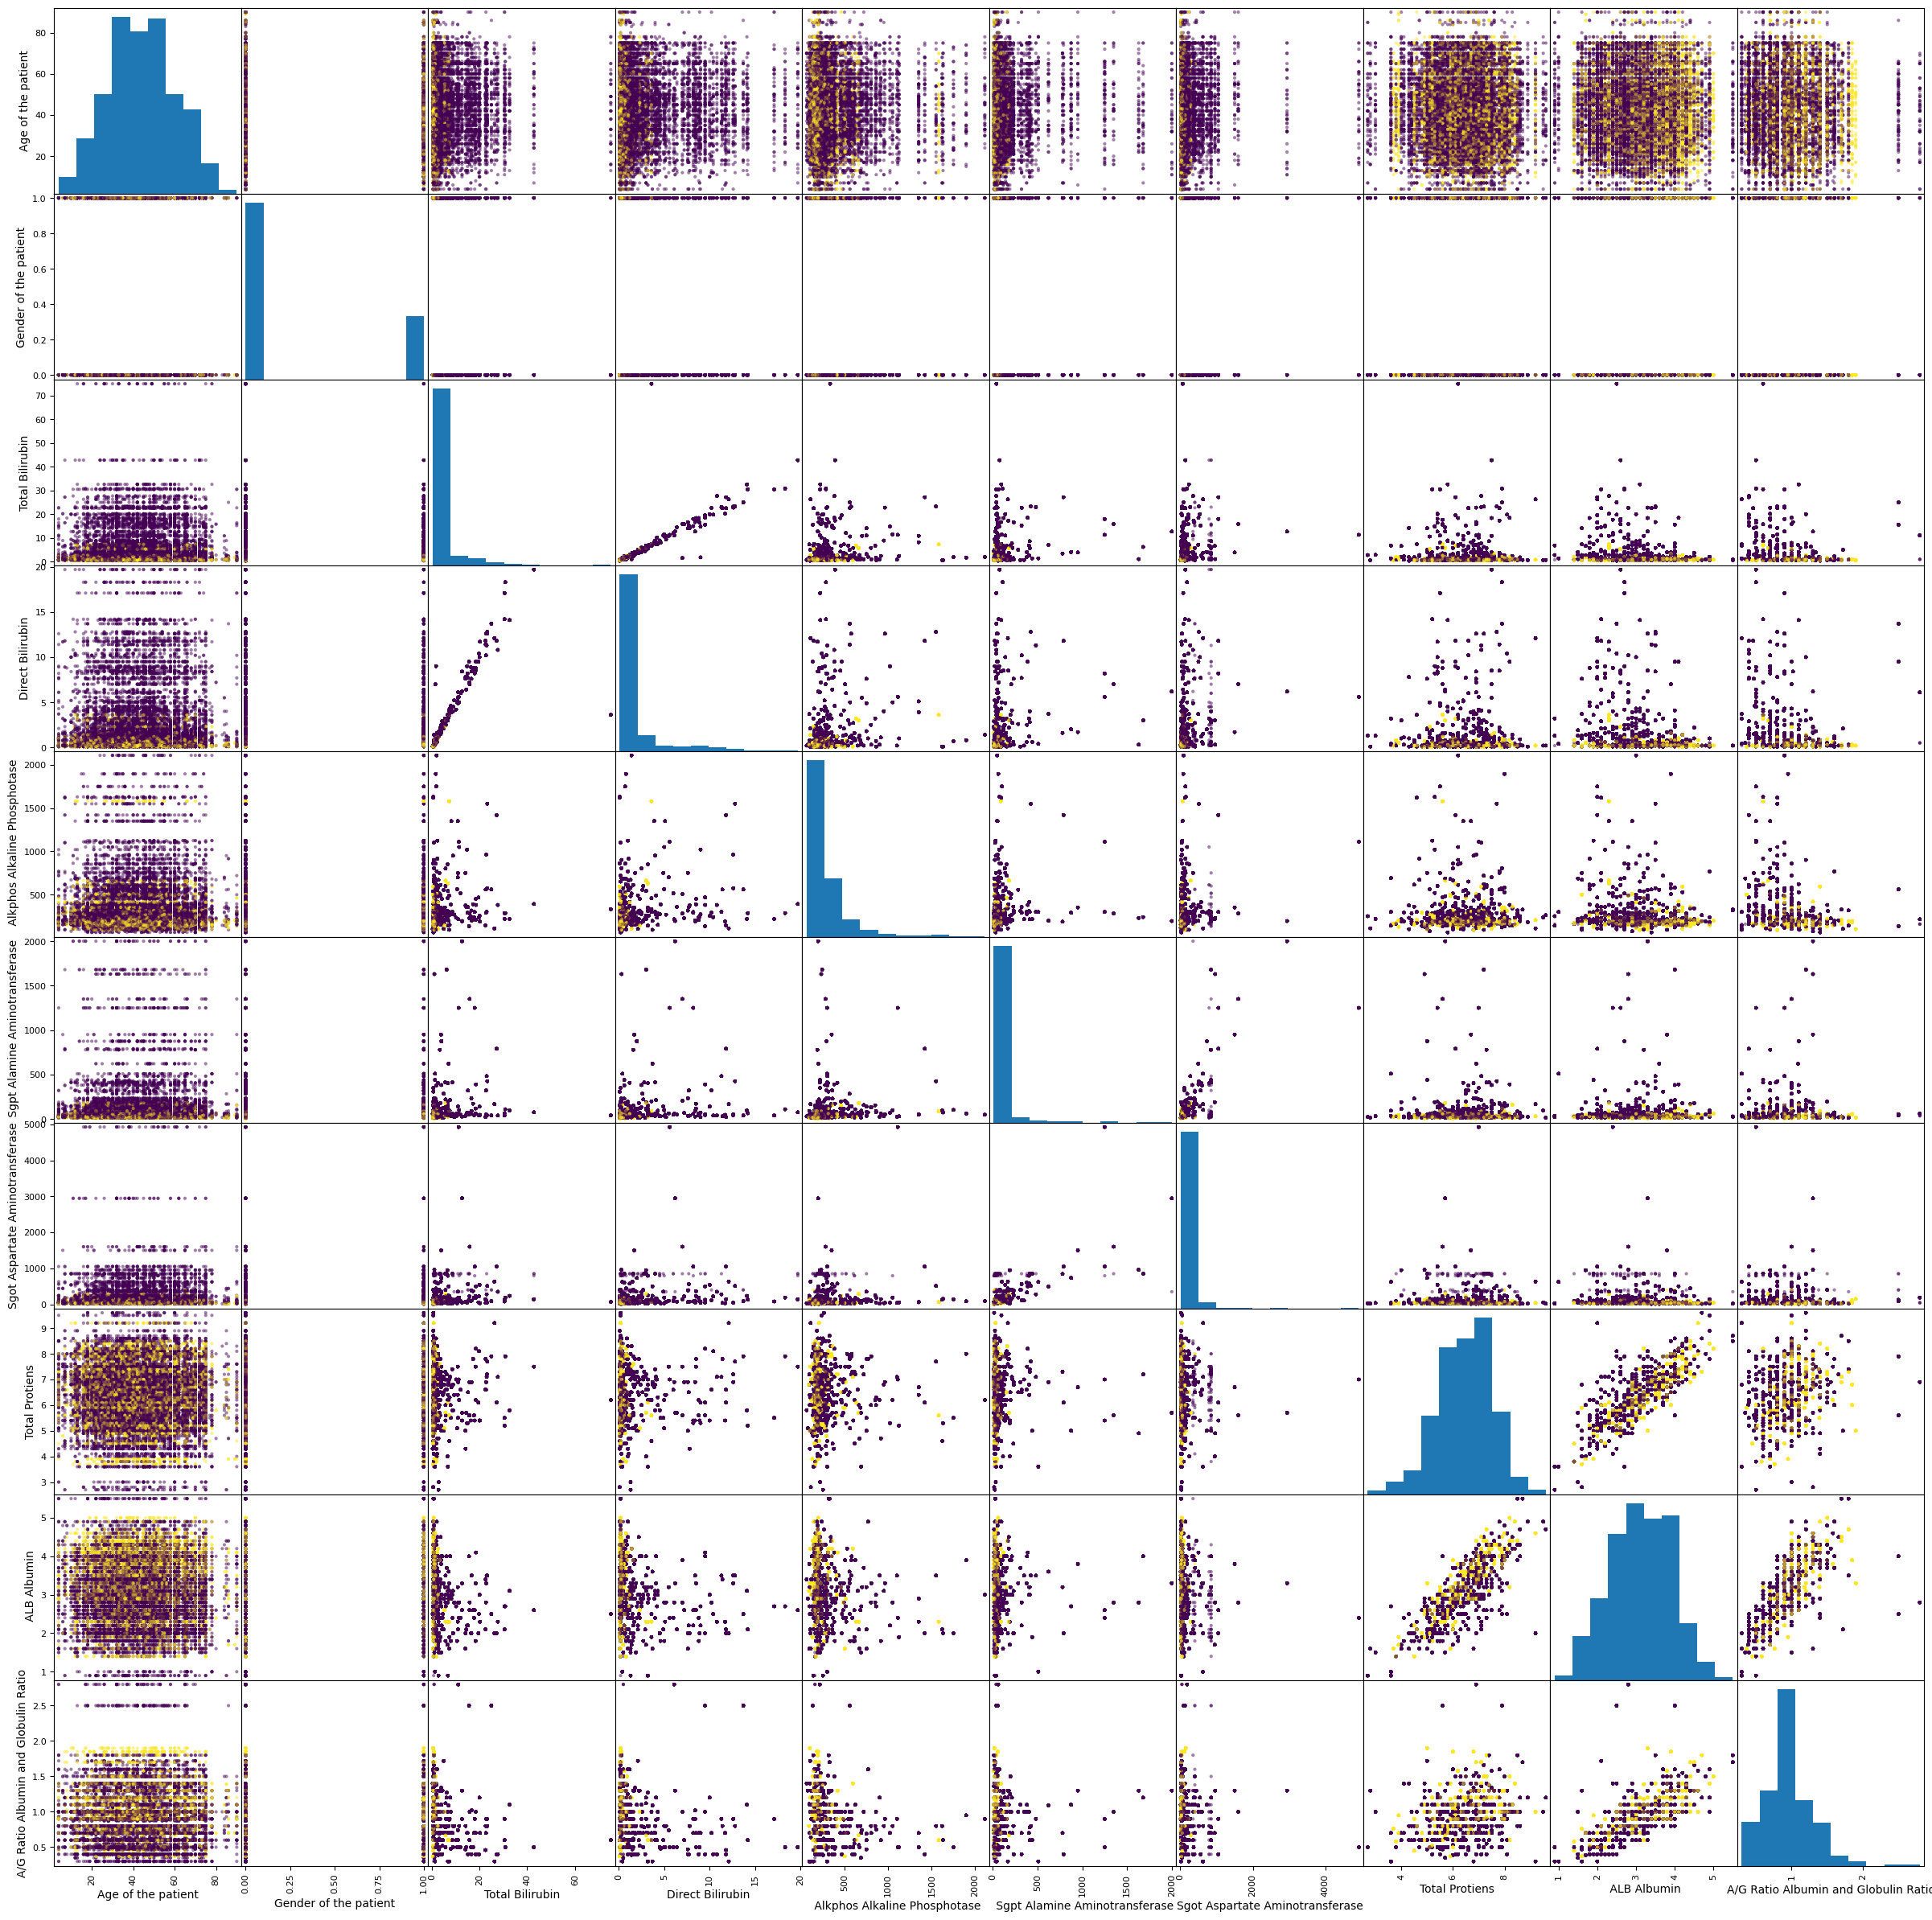

In [ ]:
df=df.dropna(axis=0, how='any')

df['Result'] = df['Result'].astype('category')

df['Gender of the patient'] = df['Gender of the patient'].map({'Male': 0,'Female': 1})

pd.plotting.scatter_matrix(df, c = df['Result'].cat.codes, figsize = [30, 30])

<Axes: >

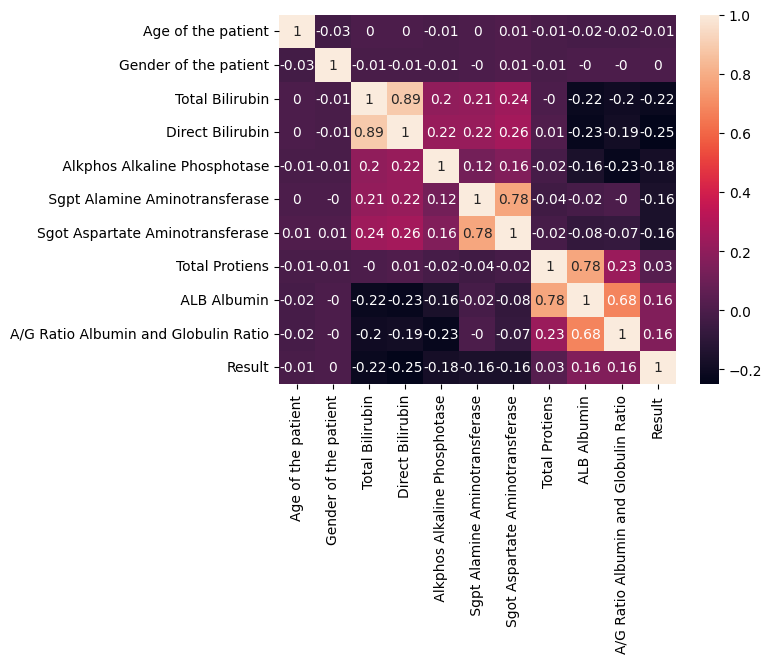

In [ ]:
dfNoResult = df.drop(['Result'], axis=1)
pearsonMatrix = df.corr()
pearsonMatrix = round(pearsonMatrix,2)
sns.heatmap(pearsonMatrix, annot=True)

In [ ]:
dfPost = pd.DataFrame()
dfNoGenderNoResult = dfNoResult.drop('Gender of the patient', axis=1)
df['Result'] = df['Result'].astype('int64')

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

dfNoOutliers = df*0

for columns in df:
  dfNoOutliers[columns] = df[columns][(df[columns] > lower[columns]) & (df[columns] < upper[columns])]

dfNoOutliers = dfNoOutliers.dropna(axis=0, how='any')

In [ ]:
Q1.head()

,0.25
Age of the patient,33.0
Gender of the patient,0.0
Total Bilirubin,0.8
Direct Bilirubin,0.2
Alkphos Alkaline Phosphotase,175.0


In [ ]:
dfNoOutliers.describe()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,18417.000000,18417.000000,18417.000000,18417.000000,18417.000000,18417.000000,18417.000000,18417.000000,18417.000000,18417.000000,18417.000000
mean,44.074931,0.263887,1.237531,0.459879,211.398491,34.103600,42.116360,6.511109,3.229120,0.973856,1.382907
std,15.783516,0.440751,0.870898,0.492347,72.533692,19.123053,29.825346,1.024045,0.747183,0.268365,0.486109
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,3.700000,1.400000,0.350000,1.000000
25%,33.000000,0.000000,0.700000,0.200000,165.000000,21.000000,23.000000,5.800000,2.700000,0.800000,1.000000
50%,45.000000,0.000000,0.900000,0.200000,193.000000,29.000000,32.000000,6.600000,3.200000,1.000000,1.000000
75%,55.000000,1.000000,1.400000,0.500000,231.000000,42.000000,53.000000,7.200000,3.900000,1.100000,2.000000
max,86.000000,1.000000,5.300000,2.900000,482.000000,120.000000,180.000000,9.200000,5.000000,1.700000,2.000000


In [ ]:
dfNorm = df*0

scalerNorm = MinMaxScaler()
dfNorm[df.columns] = scalerNorm.fit_transform(df)

dfNoOutliersNorm = dfNoOutliers*0

scalerNoOutliersNorm = MinMaxScaler()
dfNoOutliersNorm[dfNoOutliers.columns] = scalerNoOutliersNorm.fit_transform(dfNoOutliers)

In [ ]:
dfNorm.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,0.709302,1.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,0.0
1,0.674419,0.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0.0
2,0.674419,0.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0.0
3,0.627907,0.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0.0
4,0.790698,0.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0.0


In [ ]:
dfNoOutliersNorm.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,0.743902,1.0,0.061224,0.000000,0.295943,0.054545,0.047059,0.563636,0.527778,0.407407,0.0
3,0.658537,0.0,0.122449,0.107143,0.284010,0.036364,0.058824,0.563636,0.555556,0.481481,0.0
4,0.829268,0.0,0.714286,0.678571,0.315036,0.154545,0.288235,0.654545,0.277778,0.037037,0.0
5,0.512195,0.0,0.285714,0.214286,0.346062,0.081818,0.023529,0.709091,0.833333,0.703704,0.0
7,0.304878,1.0,0.102041,0.071429,0.331742,0.036364,0.005882,0.545455,0.611111,0.555556,0.0


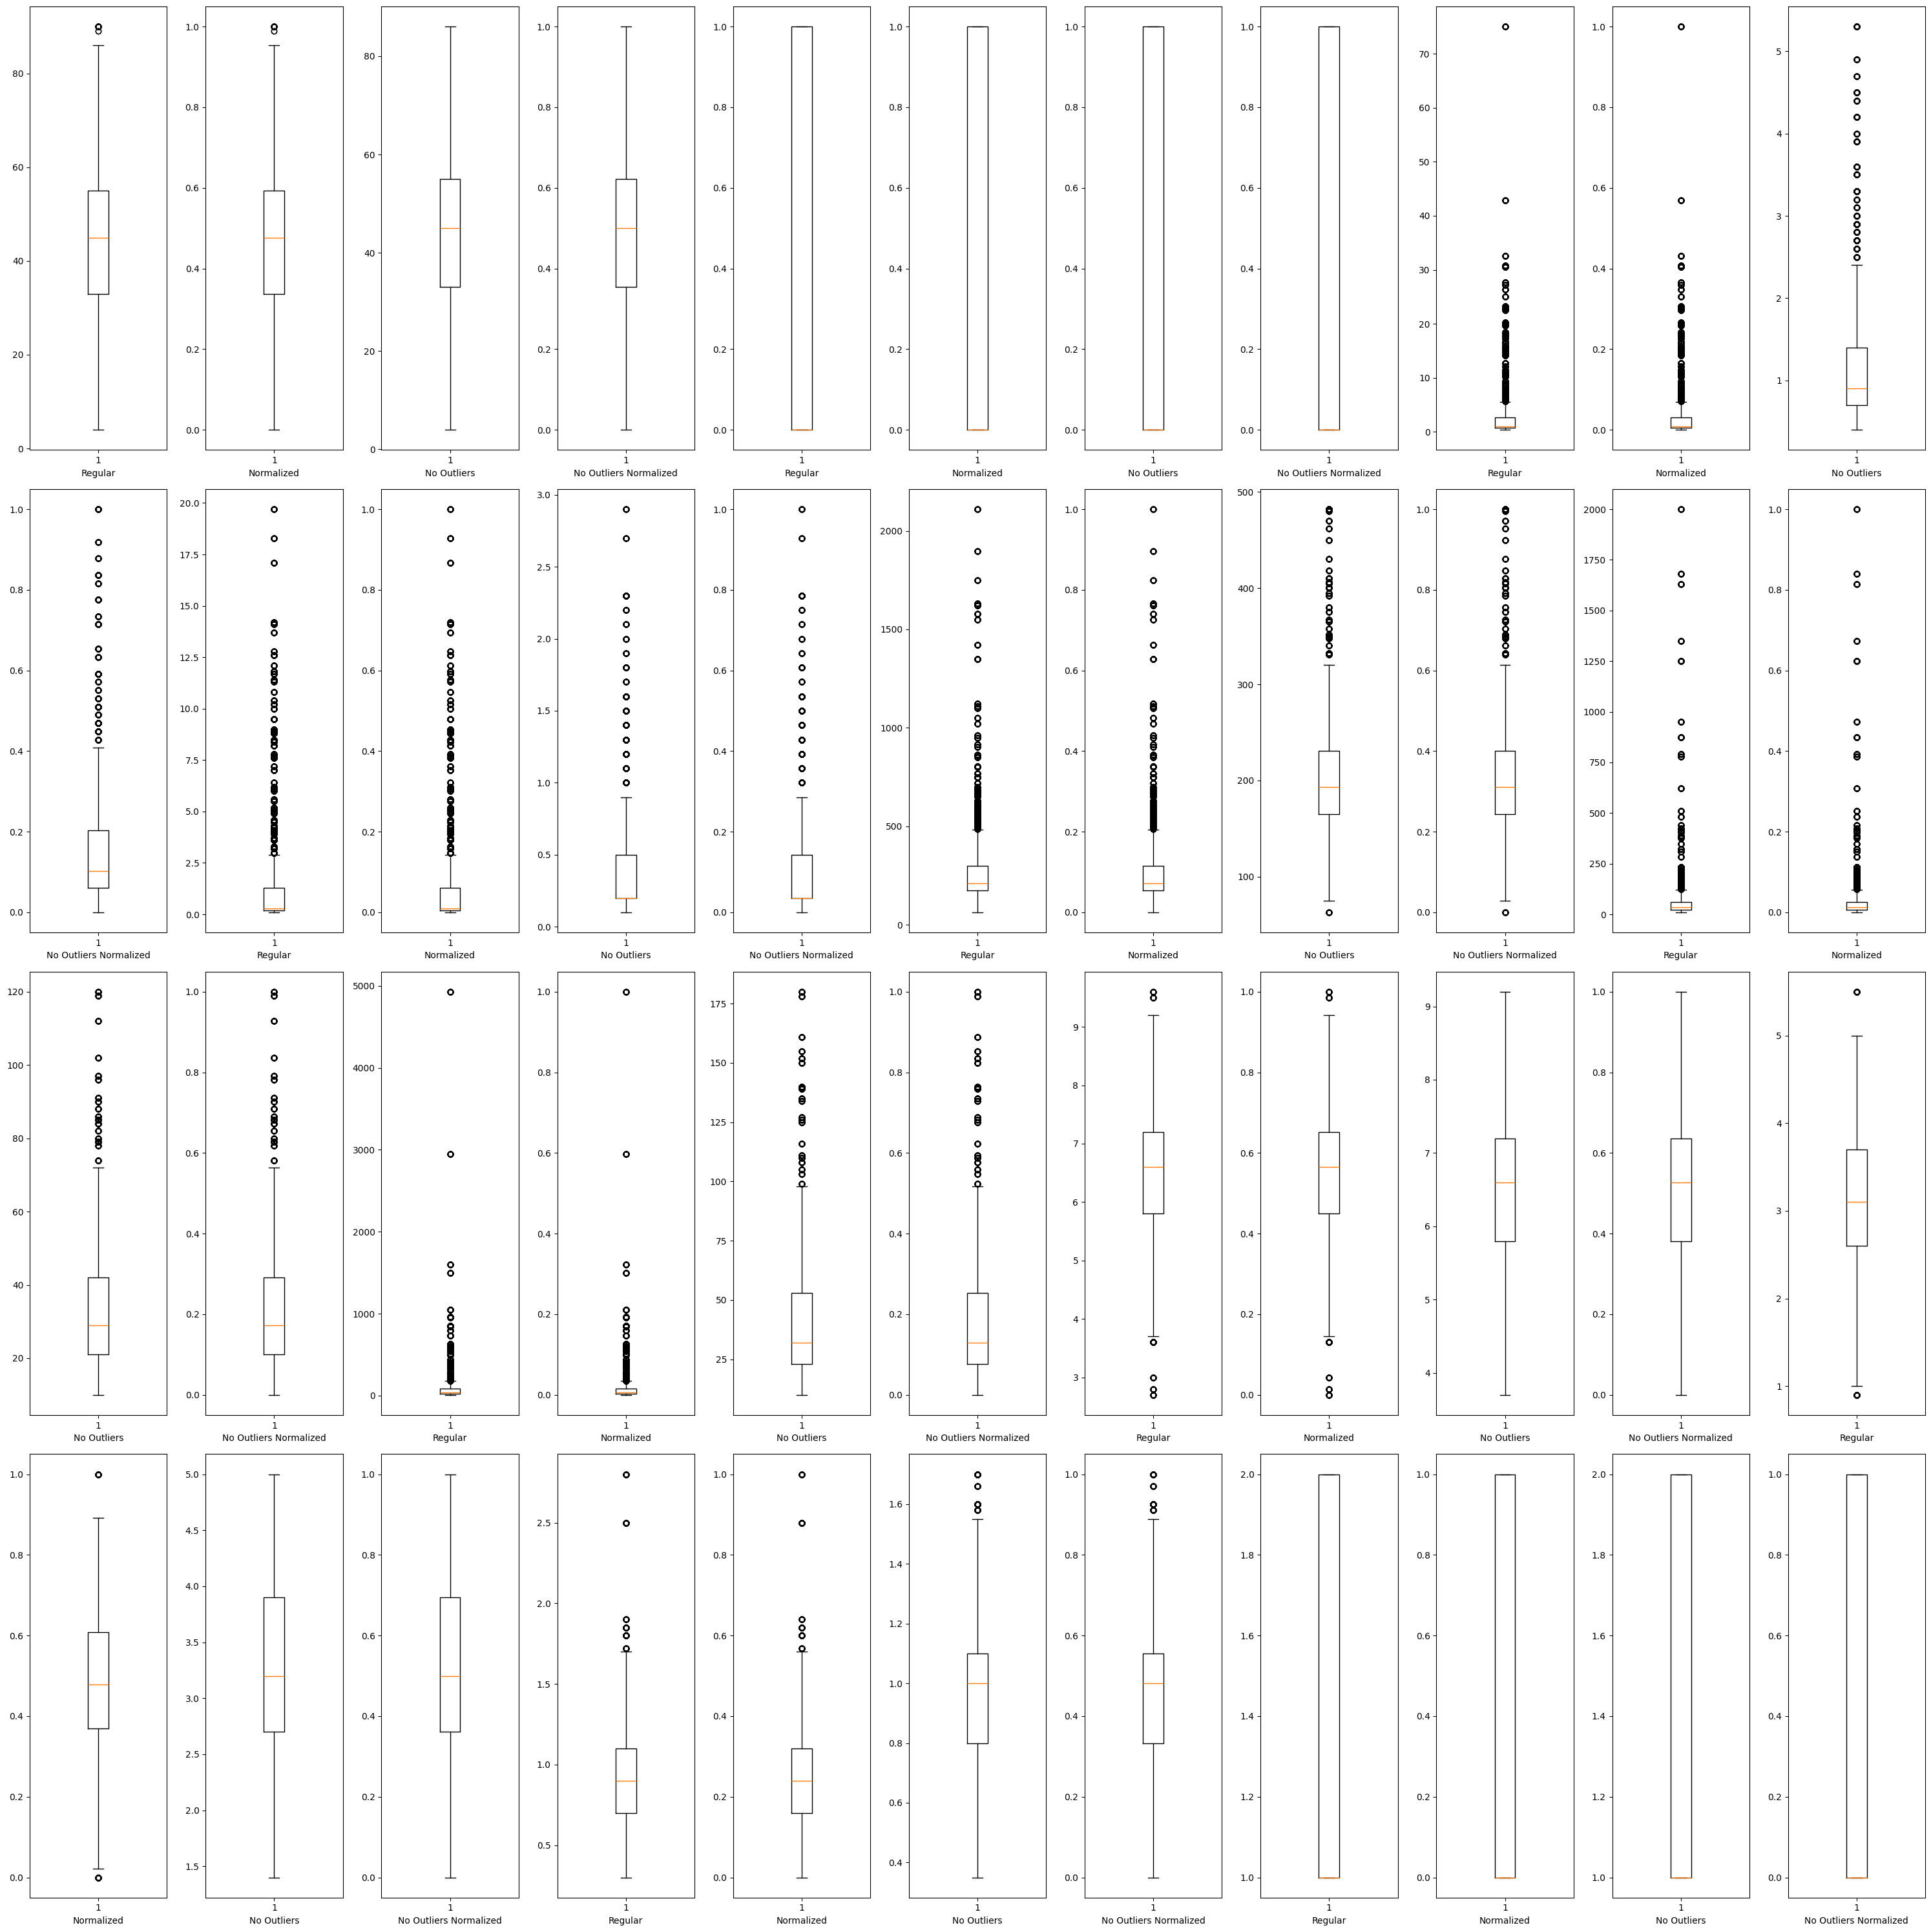

In [ ]:
fig, axs = plt.subplots(4, 11, figsize=(30, 30))
count = 0
for columns in df:
  i, j = divmod(count, 11)
  axs[i,j].boxplot(df[columns])
  axs[i,j].set_xlabel('Regular')
  count += 1
  i, j = divmod(count, 11)
  axs[i,j].boxplot(dfNorm[columns])
  axs[i,j].set_xlabel('Normalized')
  count += 1
  i, j = divmod(count, 11)
  axs[i,j].boxplot(dfNoOutliers[columns])
  axs[i,j].set_xlabel('No Outliers')
  count += 1
  i, j = divmod(count, 11)
  axs[i,j].boxplot(dfNoOutliersNorm[columns])
  axs[i,j].set_xlabel('No Outliers Normalized')
  count += 1
plt.tight_layout()
plt.show()

In [ ]:
def getMetrics(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1= f1_score(y_test, y_pred)

  roc_auc = roc_auc_score(y_test, y_pred)

  MCC = matthews_corrcoef(y_test, y_pred)

  return accuracy, precision, recall, f1, roc_auc, MCC

In [ ]:
X = df.drop('Result', axis=1)
y = df['Result'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

XNorm = dfNorm.drop('Result', axis=1)
yNorm = dfNorm['Result']

XNorm_train, XNorm_test, yNorm_train, yNorm_test = train_test_split(XNorm, yNorm, test_size=0.4)

sm = SMOTE(random_state=435)
XSmote, ySmote = sm.fit_resample(X_train, y_train)

XSmote_train, XSmote_test, ySmote_train, ySmote_test = train_test_split(XSmote, ySmote, test_size=0.4)

smNorm = SMOTE(random_state=443)
XNormSmote, yNormSmote = smNorm.fit_resample(XNorm_train, yNorm_train)

XNormSmote_train, XNormSmote_test, yNormSmote_train, yNormSmote_test = train_test_split(XNormSmote, yNormSmote, test_size=0.4)

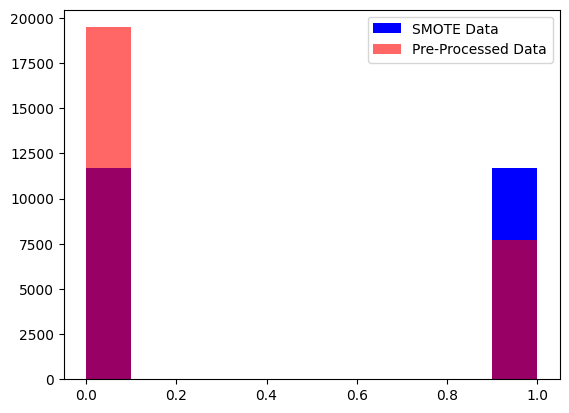

In [ ]:
plt.hist(ySmote, label='SMOTE Data', color= 'b', alpha=1)
plt.hist(y, label='Pre-Processed Data', color= 'r', alpha=0.6)
plt.legend(loc='upper right')

In [ ]:
#Unchanged Dataset
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy, precision, recall, f1, roc_auc, MCC = getMetrics(y_test, y_pred)

print("RF Accuracy:", accuracy)
print("RF Precision:", precision)
print("RF Recall:", recall)
print("RF F1 Score", f1)
print("ROC - AUC Score", roc_auc)
print("RF MCC", MCC)
print("\n")

rfNorm = RandomForestClassifier()
rfNorm = rfNorm.fit(XNorm_train, yNorm_train)

#Normalized Dataset
yNorm_pred = rfNorm.predict(XNorm_test)

accuracyNorm, precisionNorm, recallNorm, f1Norm, roc_aucNorm, MCCNorm = getMetrics(yNorm_test, yNorm_pred)

print("RF Norm Accuracy:", accuracyNorm)
print("RF Norm Precision:", precisionNorm)
print("RF Norm Recall:", recallNorm)
print("RF Norm F1 Score", f1Norm)
print("Norm ROC - AUC Score", roc_aucNorm)
print("RF Norm MCC", MCCNorm)
print("\n")

#SMOTE on Unchanged Dataset
rfSMOTE = rf.fit(XSmote_train, ySmote_train)

ySMOTE_pred = rfSMOTE.predict(XSmote_test)

accuracySMOTE, precisionSMOTE, recallSMOTE, f1SMOTE, roc_aucSMOTE, MCCSMOTE = getMetrics(ySmote_test, ySMOTE_pred)
print("RF SMOTE Accuracy:", accuracySMOTE)
print("RF SMOTE Precision:", precisionSMOTE)
print("RF SMOTE Recall:", recallSMOTE)
print("RF SMOTE F1 Score", f1SMOTE)
print("RF SMOTE ROC - AUC Score", roc_aucSMOTE)
print("RF SMOTE MCC", MCCSMOTE)
print("\n")

#SMOTE on Normalized Dataset
rfNormSMOTE = rfNorm.fit(XNormSmote_train, yNormSmote_train)

yNormSMOTE_pred = rfNormSMOTE.predict(XNormSmote_test)

accuracyNormSMOTE, precisionNormSMOTE, recallNormSMOTE, f1NormSMOTE, roc_aucNormSMOTE, MCCNormSMOTE = getMetrics(yNormSmote_test, yNormSMOTE_pred)
print("RF Normalized SMOTE Accuracy:", accuracyNormSMOTE)
print("RF Normalized SMOTE Precision:", precisionNormSMOTE)
print("RF Normalized SMOTE Recall:", recallNormSMOTE)
print("RF Normalized SMOTE F1 Score", f1NormSMOTE)
print("RF Normalized SMOTE ROC - AUC Score", roc_aucNormSMOTE)
print("RF Norm SMOTE MCC", MCCNormSMOTE)

RF Accuracy: 0.9996318114874816
RF Precision: 1.0
RF Recall: 0.9987063389391979
RF F1 Score 0.9993527508090615
ROC - AUC Score 0.999353169469599
RF MCC 0.9990958918494889


RF Norm Accuracy: 0.9997238586156112
RF Norm Precision: 1.0
RF Norm Recall: 0.9990335051546392
RF Norm F1 Score 0.9995165189363416
Norm ROC - AUC Score 0.9995167525773196
RF Norm MCC 0.9993234862231661


RF SMOTE Accuracy: 0.999572877736252
RF SMOTE Precision: 1.0
RF SMOTE Recall: 0.9991388589881594
RF SMOTE F1 Score 0.9995692440232609
RF SMOTE ROC - AUC Score 0.9995694294940797
RF SMOTE MCC 0.9991460594427318


RF Normalized SMOTE Accuracy: 0.99904
RF Normalized SMOTE Precision: 0.9997845756139595
RF Normalized SMOTE Recall: 0.99827919982792
RF Normalized SMOTE F1 Score 0.9990313206328705
RF Normalized SMOTE ROC - AUC Score 0.9990338021991907
RF Norm SMOTE MCC 0.9980809599780839


In [ ]:
#Unchanged Dataset on XGB
model = XGBClassifier()
model.fit(X_train, y_train)
yXGB_pred = model.predict(X_test)

#print(np.mean(cross_val_score(model, X_train, y_train, cv=10)))

accuracyXGB, precisionXGB, recallXGB, f1XGB, roc_aucXGB, MCCXGB = getMetrics(y_test, yXGB_pred)

print("XGB Accuracy:", accuracyXGB)
print("XGB Precision:", precisionXGB)
print("XGB Recall:", recallXGB)
print("XGB F1 Score", f1XGB)
print("XGB ROC - AUC Score", roc_aucXGB)
print("XGB MCC", MCCXGB)
print("\n")

#Normalized Dataset on XGB
modelNorm = XGBClassifier()
modelNorm.fit(XNorm_train, yNorm_train)
yNormXGB_pred = modelNorm.predict(XNorm_test)

accuracyNormXGB, precisionNormXGB, recallNormXGB, f1NormXGB, roc_aucNormXGB, MCCNormXGB = getMetrics(yNorm_test, yNormXGB_pred)

print("XGB Norm Accuracy:", accuracyNormXGB)
print("XGB Norm Precision:", precisionNormXGB)
print("XGB Norm Recall:", recallNormXGB)
print("XGB Norm F1 Score", f1NormXGB)
print("XGB Norm ROC - AUC Score", roc_aucNormXGB)
print("XGB Norm MCC", MCCNormXGB)
print("\n")

#SMOTE Dataset on XGB
model.fit(XSmote_train, ySmote_train)
yXGBSMOTE_pred = model.predict(XSmote_test)

accuracyXGBSMOTE, precisionXGBSMOTE, recallXGBSMOTE, f1XGBSMOTE, roc_aucXGBSMOTE, MCCXGBSMOTE = getMetrics(ySmote_test, yXGBSMOTE_pred)

print("XGB SMOTE Accuracy:", accuracyXGBSMOTE)
print("XGB SMOTE Precision:", precisionXGBSMOTE)
print("XGB SMOTE Recall:", recallXGBSMOTE)
print("XGB SMOTE F1 Score", f1XGBSMOTE)
print("XGB SMOTE ROC - AUC Score", roc_aucXGBSMOTE)
print("XGB SMOTE MCC", MCCXGBSMOTE)
print("\n")

#Normalized SMOTE Dataset on XGB
modelNorm.fit(XNormSmote_train, yNormSmote_train)
yXGBNormSMOTE_pred = modelNorm.predict(XNormSmote_test)

accuracyXGBNormSMOTE, precisionXGBNormSMOTE, recallXGBNormSMOTE, f1XGBNormSMOTE, roc_aucXGBNormSMOTE, MCCXGBNormSMOTE = getMetrics(yNormSmote_test, yXGBNormSMOTE_pred)

print("XGB Norm SMOTE Accuracy:", accuracyXGBNormSMOTE)
print("XGB Norm SMOTE Precision:", precisionXGBNormSMOTE)
print("XGB Norm SMOTE Recall:", recallXGBNormSMOTE)
print("XGB Norm SMOTE F1 Score", f1XGBNormSMOTE)
print("XGB Norm SMOTE ROC - AUC Score", roc_aucXGBNormSMOTE)
print("XGB Norm SMOTE MCC", MCCXGBNormSMOTE)

XGB Accuracy: 0.9994477172312224
XGB Precision: 0.9993527508090615
XGB Recall: 0.9987063389391979
XGB F1 Score 0.999029440310579
XGB ROC - AUC Score 0.9992245024598202
XGB MCC 0.9986435910872576


XGB Norm Accuracy: 0.9997238586156112
XGB Norm Precision: 1.0
XGB Norm Recall: 0.9990335051546392
XGB Norm F1 Score 0.9995165189363416
XGB Norm ROC - AUC Score 0.9995167525773196
XGB Norm MCC 0.9993234862231661


XGB SMOTE Accuracy: 0.999252536038441
XGB SMOTE Precision: 0.9997844827586206
XGB SMOTE Recall: 0.9987082884822389
XGB SMOTE F1 Score 0.9992460958535272
XGB SMOTE ROC - AUC Score 0.9992482120377296
XGB SMOTE MCC 0.998505532740573


XGB Norm SMOTE Accuracy: 0.9988266666666666
XGB Norm SMOTE Precision: 0.9997844827586206
XGB Norm SMOTE Recall: 0.9978489997848999
XGB Norm SMOTE F1 Score 0.9988158036387125
XGB Norm SMOTE ROC - AUC Score 0.9988187021776807
XGB Norm SMOTE MCC 0.9976549771931417


In [ ]:
#Unchanged Dataset on GB
gbModel = GradientBoostingClassifier()
gbModel.fit(X_train, y_train)

yGB_pred = gbModel.predict(X_test)

accuracyGB, precisionGB, recallGB, f1GB, roc_aucGB, MCCGB = getMetrics(y_test, yXGB_pred)

print("GB Accuracy:", accuracyGB)
print("GB Precision:", precisionGB)
print("GB Recall:", recallGB)
print("GB F1 Score", f1GB)
print("GB ROC - AUC Score", roc_aucGB)
print("GB MCC", MCCGB)
print("\n")

#Normalized Dataset on GB
gbNormModel = GradientBoostingClassifier()
gbNormModel.fit(XNorm_train, yNorm_train)
yNormGB_pred = gbNormModel.predict(XNorm_test)

accuracyNormGB, precisionNormGB, recallNormGB, f1NormGB, roc_aucNormGB, MCCNormGB = getMetrics(yNorm_test, yNormGB_pred)

print("GB Norm Accuracy:", accuracyNormGB)
print("GB Norm Precision:", precisionNormGB)
print("GB Norm Recall:", recallNormGB)
print("GB Norm F1 Score", f1NormGB)
print("GB Norm ROC - AUC Score", roc_aucNormGB)
print("GB Norm MCC", MCCNormGB)
print("\n")

#SMOTE Dataset on GB
gbModel.fit(XSmote_train, ySmote_train)
yGBSMOTE_pred = gbModel.predict(XSmote_test)

accuracyGBSMOTE, precisionGBSMOTE, recallGBSMOTE, f1GBSMOTE, roc_aucGBSMOTE, MCCGBSMOTE = getMetrics(ySmote_test, yGBSMOTE_pred)

print("GB SMOTE Accuracy:", accuracyGBSMOTE)
print("GB SMOTE Precision:", precisionGBSMOTE)
print("GB SMOTE Recall:", recallGBSMOTE)
print("GB SMOTE F1 Score", f1GBSMOTE)
print("GB SMOTE ROC - AUC Score", roc_aucGBSMOTE)
print("GB SMOTE MCC", MCCGBSMOTE)
print("\n")

#Normalized SMOTE Dataset on GB
gbNormModel.fit(XNormSmote_train, yNormSmote_train)
yGBNormSMOTE_pred = gbNormModel.predict(XNormSmote_test)

accuracyGBNormSMOTE, precisionGBNormSMOTE, recallGBNormSMOTE, f1GBNormSMOTE, roc_aucGBNormSMOTE, MCCGBNormSMOTE = getMetrics(yNormSmote_test, yGBNormSMOTE_pred)

print("GB Norm SMOTE Accuracy:", accuracyGBNormSMOTE)
print("GB Norm SMOTE Precision:", precisionGBNormSMOTE)
print("GB Norm SMOTE Recall:", recallGBNormSMOTE)
print("GB Norm SMOTE F1 Score", f1GBNormSMOTE)
print("GB Norm SMOTE ROC - AUC Score", roc_aucGBNormSMOTE)
print("GB Norm SMOTE MCC", MCCGBNormSMOTE)

GB Accuracy: 0.9994477172312224
GB Precision: 0.9993527508090615
GB Recall: 0.9987063389391979
GB F1 Score 0.999029440310579
GB ROC - AUC Score 0.9992245024598202
GB MCC 0.9986435910872576


GB Norm Accuracy: 0.9021539027982327
GB Norm Precision: 0.9545657015590201
GB Norm Recall: 0.6903994845360825
GB Norm F1 Score 0.8012712656571321
GB Norm ROC - AUC Score 0.8386275773195877
GB Norm MCC 0.755626922333251


GB SMOTE Accuracy: 0.8958889482114255
GB SMOTE Precision: 0.8423507462686567
GB SMOTE Recall: 0.9720129171151776
GB SMOTE F1 Score 0.9025487256371814
GB SMOTE ROC - AUC Score 0.8964937466931819
GB SMOTE MCC 0.8013948391392063


GB Norm SMOTE Accuracy: 0.8750933333333333
GB Norm SMOTE Precision: 0.822634508348794
GB Norm SMOTE Recall: 0.9537534953753496
GB Norm SMOTE F1 Score 0.8833549158282697
GB Norm SMOTE ROC - AUC Score 0.8757341323681657
GB Norm SMOTE MCC 0.7600264925034113


In [ ]:
#Unchanged Dataset on SVM
svmModel = svm.SVC(kernel='poly')
svmModel.fit(X_train, y_train)
ySVM_pred = svmModel.predict(X_test)

accuracySVM, precisionSVM, recallSVM, f1SVM, roc_aucSVM, MCCSVM = getMetrics(y_test, ySVM_pred)

print("SVM Accuracy:", accuracySVM)
print("SVM Precision:", precisionSVM)
print("SVM Recall:", recallSVM)
print("SVM F1 Score", f1SVM)
print("SVM ROC - AUC Score", roc_aucSVM)
print("SVM MCC", MCCSVM)
print("\n")

#Normalized Dataset on SVM
svmNormModel = svm.SVC(kernel='poly')
svmNormModel.fit(XNorm_train, yNorm_train)
yNormSVM_pred = svmNormModel.predict(XNorm_test)

accuracyNormSVM, precisionNormSVM, recallNormSVM, f1NormSVM, roc_aucNormSVM, MCCNormSVM = getMetrics(yNorm_test, yNormSVM_pred)

print("SVM Norm Accuracy:", accuracyNormSVM)
print("SVM Norm Precision:", precisionNormSVM)
print("SVM Norm Recall:", recallNormSVM)
print("SVM Norm F1 Score", f1NormSVM)
print("SVM Norm ROC - AUC Score", roc_aucNormSVM)
print("SVM Norm MCC", MCCNormSVM)
print("\n")

#SMOTE Dataset on SVM
svmModel.fit(XSmote_train, ySmote_train)
ySVMSMOTE_pred = svmModel.predict(XSmote_test)

accuracySVMSMOTE, precisionSVMSMOTE, recallSVMSMOTE, f1SVMSMOTE, roc_aucSVMSMOTE, MCCSVMSMOTE = getMetrics(ySmote_test, ySVMSMOTE_pred)

print("SVM SMOTE Accuracy:", accuracySVMSMOTE)
print("SVM SMOTE Precision:", precisionSVMSMOTE)
print("SVM SMOTE Recall:", recallSVMSMOTE)
print("SVM SMOTE F1 Score", f1SVMSMOTE)
print("SVM SMOTE ROC - AUC Score", roc_aucSVMSMOTE)
print("SVM SMOTE MCC", MCCSVMSMOTE)
print("\n")

#Normalized SMOTE Dataset on SVM
svmNormModel.fit(XNormSmote_train, yNormSmote_train)
yNormSmoteSVM_pred = svmNormModel.predict(XNormSmote_test)

accuracyNormSVMSMOTE, precisionNormSVMSMOTE, recallSVMNormSMOTE, f1SVMNormSMOTE, roc_aucSVMNormSMOTE, MCCSVMNormSMOTE = getMetrics(yNormSmote_test, yNormSmoteSVM_pred)

print("SVM Norm SMOTE Accuracy:", accuracyNormSVMSMOTE)
print("SVM Norm SMOTE Precision:", precisionNormSVMSMOTE)
print("SVM Norm SMOTE Recall:", recallSVMNormSMOTE)
print("SVM Norm SMOTE F1 Score", f1SVMNormSMOTE)
print("SVM Norm SMOTE ROC - AUC Score", roc_aucSVMNormSMOTE)
print("SVM Norm SMOTE MCC", MCCSVMNormSMOTE)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy: 0.7153902798232695
SVM Precision: 0.0
SVM Recall: 0.0
SVM F1 Score 0.0
SVM ROC - AUC Score 0.5
SVM MCC 0.0




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Norm Accuracy: 0.7142857142857143
SVM Norm Precision: 0.0
SVM Norm Recall: 0.0
SVM Norm F1 Score 0.0
SVM Norm ROC - AUC Score 0.5
SVM Norm MCC 0.0


SVM SMOTE Accuracy: 0.6549919914575547
SVM SMOTE Precision: 0.5932471643365866
SVM SMOTE Recall: 0.9683530678148546
SVM SMOTE F1 Score 0.7357487527602846
SVM SMOTE ROC - AUC Score 0.65748161865319
SVM SMOTE MCC 0.4011032329668802


SVM Norm SMOTE Accuracy: 0.6980266666666667
SVM Norm SMOTE Precision: 0.6325072886297376
SVM Norm SMOTE Recall: 0.9333189933318994
SVM Norm SMOTE F1 Score 0.7540185941437136
SVM Norm SMOTE ROC - AUC Score 0.6999434577323906
SVM Norm SMOTE MCC 0.4512661659798031


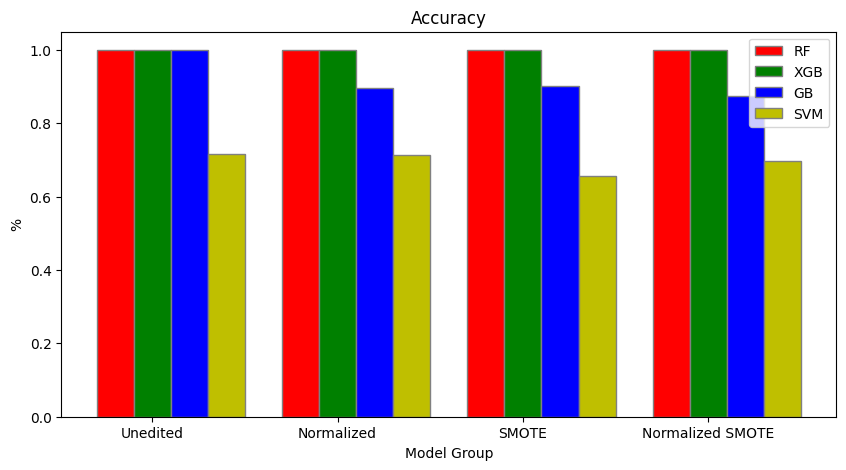

In [ ]:
barWidth = 0.20

ydataUneditedAcc = [accuracy, accuracyNorm, accuracySMOTE,accuracyNormSMOTE]
ydataNormAcc = [accuracyXGB, accuracyNormXGB, accuracyXGBSMOTE, accuracyXGBNormSMOTE]
ydataSMOTEAcc = [accuracyGB, accuracyGBSMOTE, accuracyNormGB, accuracyGBNormSMOTE]
ydataNormSMOTEAcc = [accuracySVM, accuracyNormSVM, accuracySVMSMOTE, accuracyNormSVMSMOTE]

br1 = np.arange(len(ydataUneditedAcc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

fig = plt.figure(figsize = (10, 5))

plt.bar(br1, ydataUneditedAcc, color ='r', width = barWidth,
        edgecolor ='grey', label ='RF')

plt.bar(br2, ydataNormAcc, color ='g', width = barWidth,
        edgecolor ='grey', label ='XGB')
plt.bar(br3, ydataSMOTEAcc, color ='b', width = barWidth,
        edgecolor ='grey', label ='GB')
plt.bar(br4, ydataNormSMOTEAcc, color ='y', width = barWidth,
        edgecolor ='grey', label ='SVM')

plt.xlabel("Model Group")
plt.ylabel("%")
plt.title("Accuracy")
plt.xticks([r + barWidth for r in range(len(ydataUneditedAcc))],
        ['Unedited', 'Normalized', 'SMOTE', 'Normalized SMOTE'])

plt.legend()
plt.show()

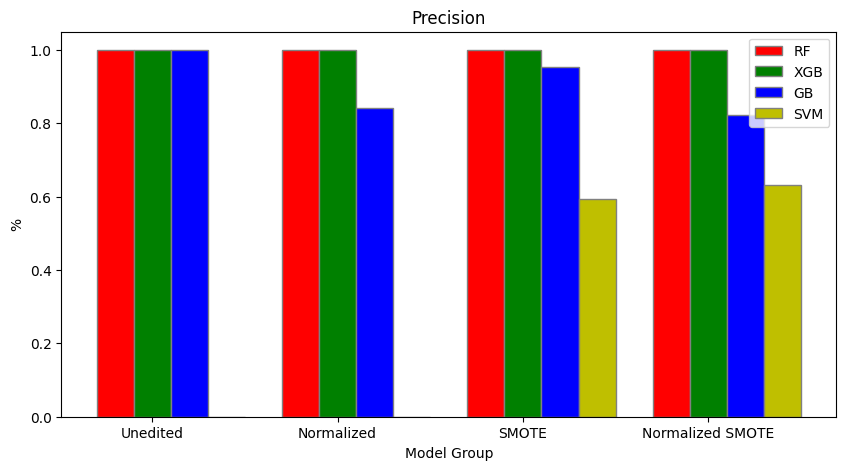

In [ ]:
barWidth = 0.20

ydataUneditedPrecision = [precision, precisionNorm, precisionSMOTE,precisionNormSMOTE]
ydataNormPrecision = [precisionXGB, precisionNormXGB, precisionXGBSMOTE, precisionXGBNormSMOTE]
ydataSMOTEPrecision = [precisionGB, precisionGBSMOTE, precisionNormGB, precisionGBNormSMOTE]
ydataNormSMOTEPrecision = [precisionSVM, precisionNormSVM, precisionSVMSMOTE, precisionNormSVMSMOTE]

br1 = np.arange(len(ydataUneditedPrecision))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

fig = plt.figure(figsize = (10, 5))

plt.bar(br1, ydataUneditedPrecision, color ='r', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br2, ydataNormPrecision, color ='g', width = barWidth,
        edgecolor ='grey', label ='XGB')
plt.bar(br3, ydataSMOTEPrecision, color ='b', width = barWidth,
        edgecolor ='grey', label ='GB')
plt.bar(br4, ydataNormSMOTEPrecision, color ='y', width = barWidth,
        edgecolor ='grey', label ='SVM')

plt.xlabel("Model Group")
plt.ylabel("%")
plt.title("Precision")
plt.xticks([r + barWidth for r in range(len(ydataUneditedPrecision))],
        ['Unedited', 'Normalized', 'SMOTE', 'Normalized SMOTE'])

plt.legend()
plt.show()

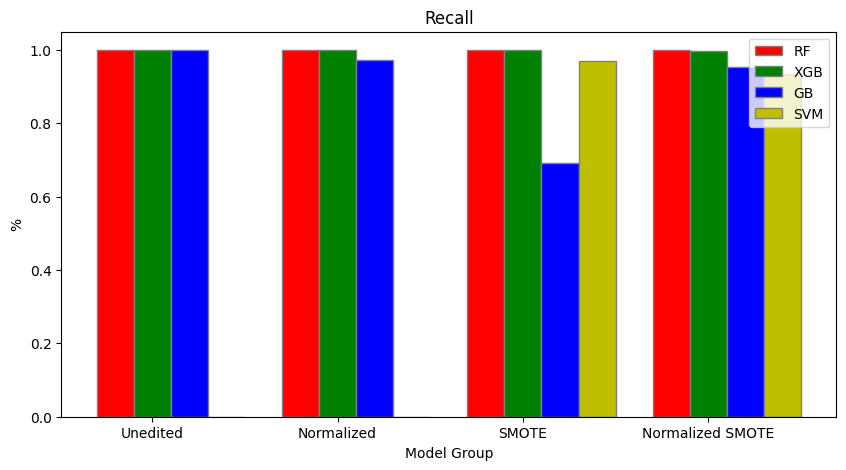

In [ ]:
barWidth = 0.20

ydataUneditedRecall = [recall, recallNorm, recallSMOTE,recallNormSMOTE]
ydataNormRecall = [recallXGB, recallNormXGB, recallXGBSMOTE, recallXGBNormSMOTE]
ydataSMOTERecall = [recallGB, recallGBSMOTE, recallNormGB, recallGBNormSMOTE]
ydataNormSMOTERecall = [recallSVM, recallNormSVM, recallSVMSMOTE, recallSVMNormSMOTE]

br1 = np.arange(len(ydataUneditedRecall))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

fig = plt.figure(figsize = (10, 5))

plt.bar(br1, ydataUneditedRecall, color ='r', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br2, ydataNormRecall, color ='g', width = barWidth,
        edgecolor ='grey', label ='XGB')
plt.bar(br3, ydataSMOTERecall, color ='b', width = barWidth,
        edgecolor ='grey', label ='GB')
plt.bar(br4, ydataNormSMOTERecall, color ='y', width = barWidth,
        edgecolor ='grey', label ='SVM')

plt.xlabel("Model Group")
plt.ylabel("%")
plt.title("Recall")
plt.xticks([r + barWidth for r in range(len(ydataUneditedRecall))],
        ['Unedited', 'Normalized', 'SMOTE', 'Normalized SMOTE'])

plt.legend(loc='upper right')
plt.show()

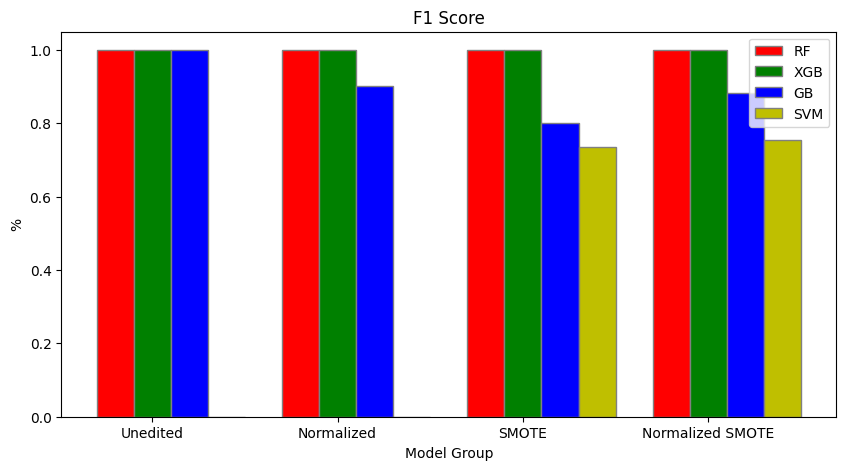

In [ ]:
barWidth = 0.20

ydataUneditedF1 = [f1, f1Norm, f1SMOTE, f1NormSMOTE]
ydataNormF1 = [f1XGB, f1NormXGB, f1XGBSMOTE, f1XGBNormSMOTE]
ydataSMOTEF1 = [f1GB, f1GBSMOTE, f1NormGB, f1GBNormSMOTE]
ydataNormSMOTEF1 = [f1SVM, f1NormSVM, f1SVMSMOTE, f1SVMNormSMOTE]

br1 = np.arange(len(ydataUneditedF1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

fig = plt.figure(figsize = (10, 5))

plt.bar(br1, ydataUneditedF1, color ='r', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br2, ydataNormF1, color ='g', width = barWidth,
        edgecolor ='grey', label ='XGB')
plt.bar(br3, ydataSMOTEF1, color ='b', width = barWidth,
        edgecolor ='grey', label ='GB')
plt.bar(br4, ydataNormSMOTEF1, color ='y', width = barWidth,
        edgecolor ='grey', label ='SVM')

plt.xlabel("Model Group")
plt.ylabel("%")
plt.title("F1 Score")
plt.xticks([r + barWidth for r in range(len(ydataUneditedF1))],
        ['Unedited', 'Normalized', 'SMOTE', 'Normalized SMOTE'])

plt.legend()
plt.show()

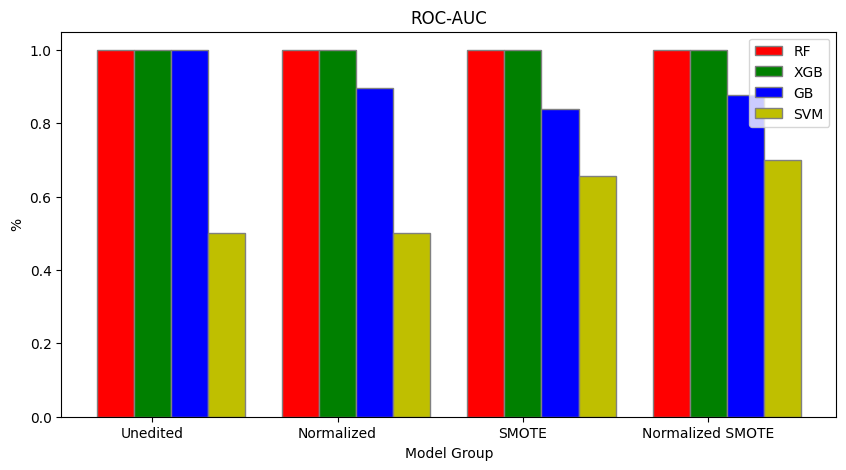

In [ ]:
barWidth = 0.20

ydataUneditedROCAUC = [roc_auc, roc_aucNorm, roc_aucSMOTE, roc_aucNormSMOTE]
ydataNormROCAUC = [roc_aucXGB, roc_aucNormXGB, roc_aucXGBSMOTE, roc_aucXGBNormSMOTE]
ydataSMOTEROCAUC = [roc_aucGB, roc_aucGBSMOTE, roc_aucNormGB, roc_aucGBNormSMOTE]
ydataNormSMOTEROCAUC = [roc_aucSVM, roc_aucNormSVM, roc_aucSVMSMOTE, roc_aucSVMNormSMOTE]

br1 = np.arange(len(ydataUneditedROCAUC))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

fig = plt.figure(figsize = (10, 5))

plt.bar(br1, ydataUneditedROCAUC, color ='r', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br2, ydataNormROCAUC, color ='g', width = barWidth,
        edgecolor ='grey', label ='XGB')
plt.bar(br3, ydataSMOTEROCAUC, color ='b', width = barWidth,
        edgecolor ='grey', label ='GB')
plt.bar(br4, ydataNormSMOTEROCAUC, color ='y', width = barWidth,
        edgecolor ='grey', label ='SVM')

plt.xlabel("Model Group")
plt.ylabel("%")
plt.title("ROC-AUC")
plt.xticks([r + barWidth for r in range(len(ydataUneditedROCAUC))],
        ['Unedited', 'Normalized', 'SMOTE', 'Normalized SMOTE'])

plt.legend()
plt.show()

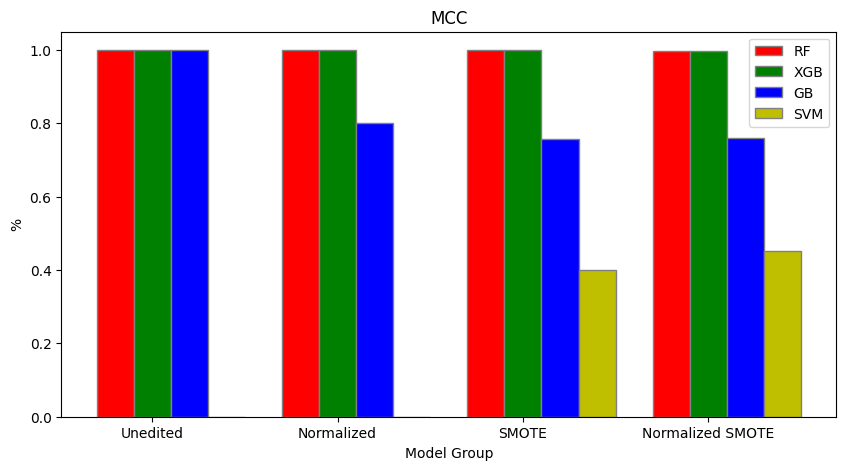

In [ ]:
barWidth = 0.20

ydataUneditedMCC = [MCC, MCCNorm, MCCSMOTE, MCCNormSMOTE]
ydataNormMCC = [MCCXGB, MCCNormXGB, MCCXGBSMOTE, MCCXGBNormSMOTE]
ydataSMOTEMCC = [MCCGB, MCCGBSMOTE, MCCNormGB, MCCGBNormSMOTE]
ydataNormSMOTEMCC = [MCCSVM, MCCNormSVM, MCCSVMSMOTE, MCCSVMNormSMOTE]

br1 = np.arange(len(ydataUneditedMCC))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

fig = plt.figure(figsize = (10, 5))

plt.bar(br1, ydataUneditedMCC, color ='r', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br2, ydataNormMCC, color ='g', width = barWidth,
        edgecolor ='grey', label ='XGB')
plt.bar(br3, ydataSMOTEMCC, color ='b', width = barWidth,
        edgecolor ='grey', label ='GB')
plt.bar(br4, ydataNormSMOTEMCC, color ='y', width = barWidth,
        edgecolor ='grey', label ='SVM')

plt.xlabel("Model Group")
plt.ylabel("%")
plt.title("MCC")
plt.xticks([r + barWidth for r in range(len(ydataUneditedMCC))],
        ['Unedited', 'Normalized', 'SMOTE', 'Normalized SMOTE'])

plt.legend()
plt.show()

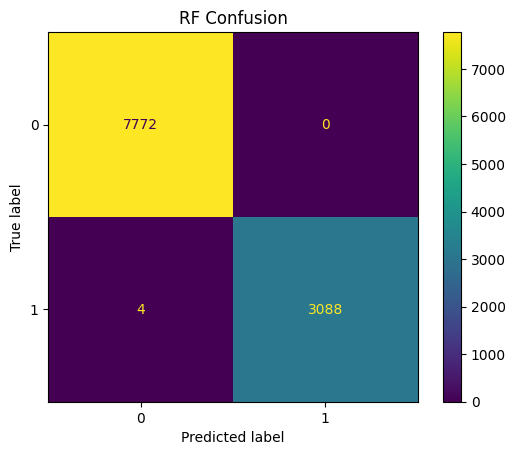

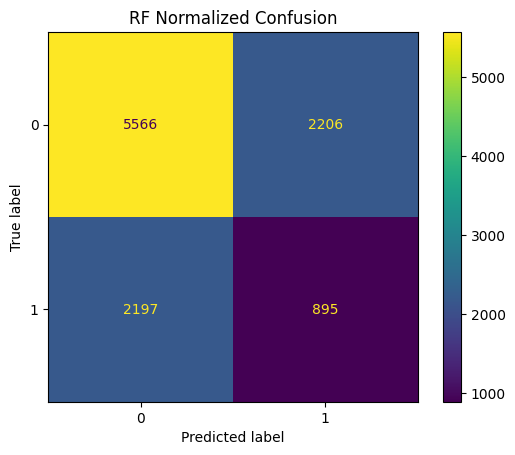

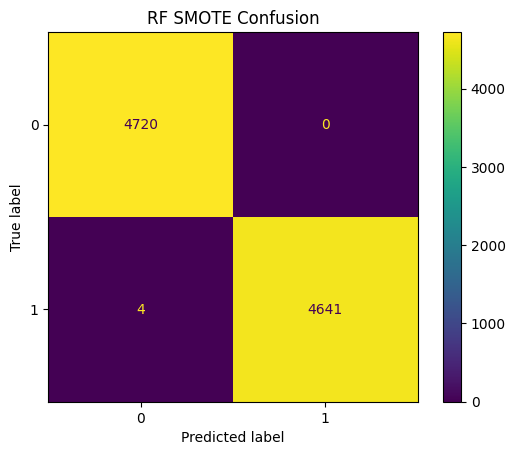

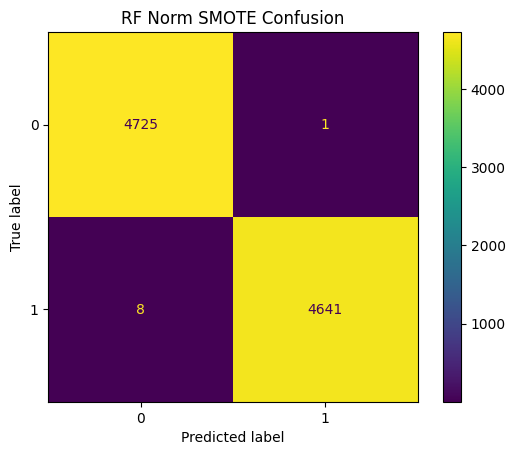

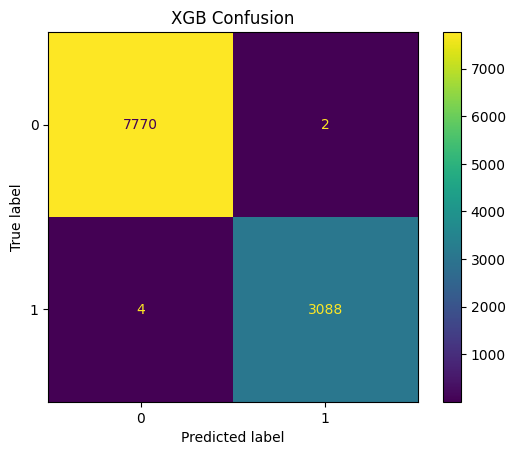

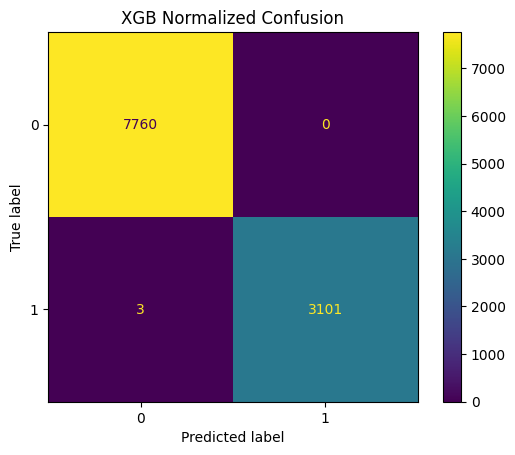

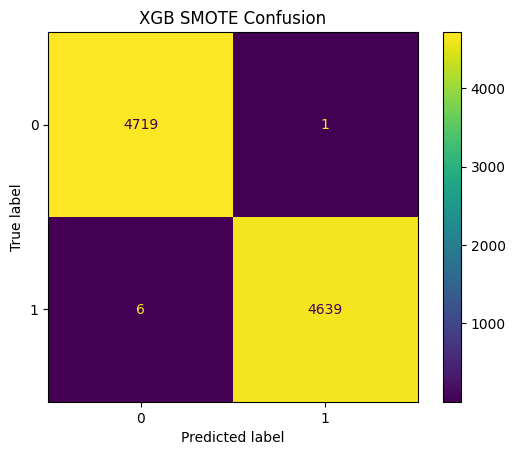

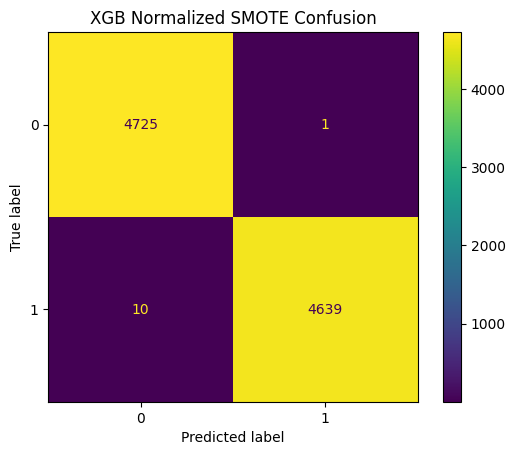

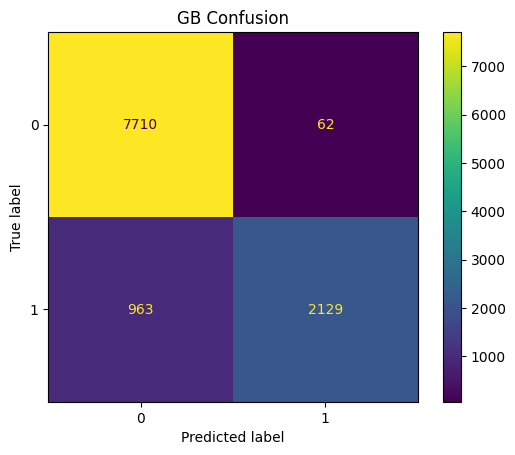

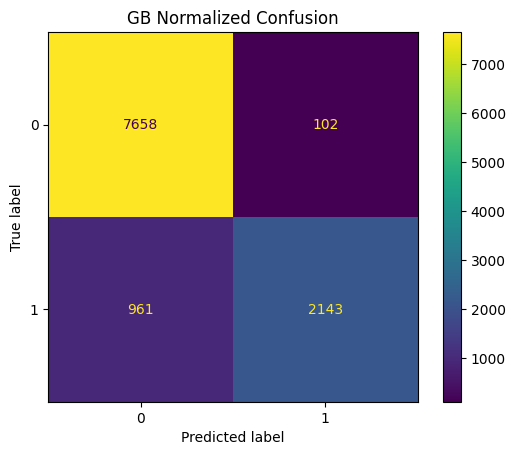

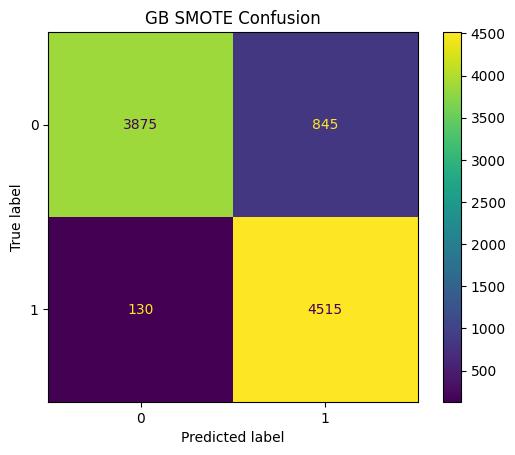

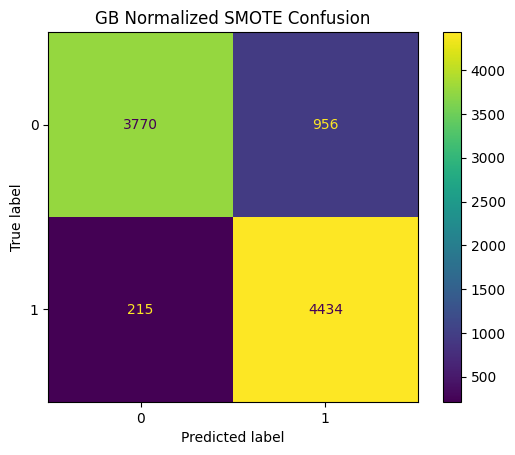

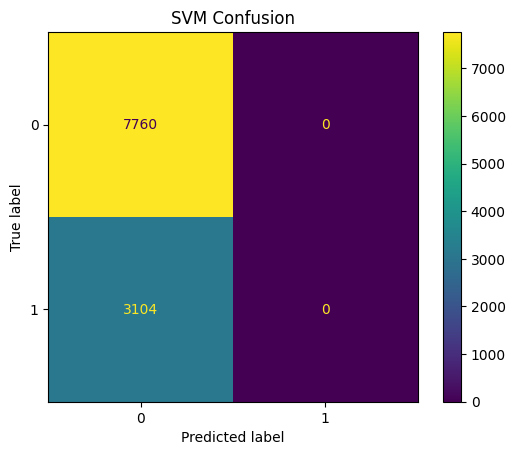

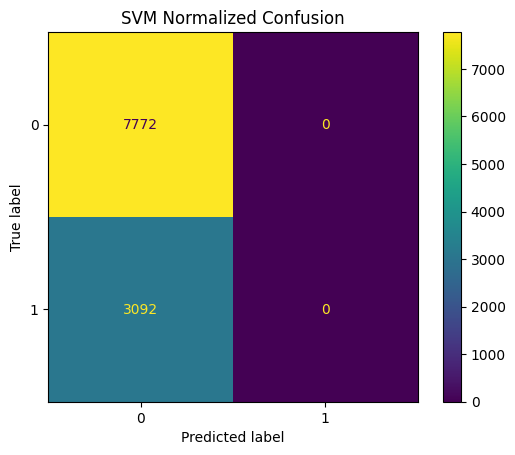

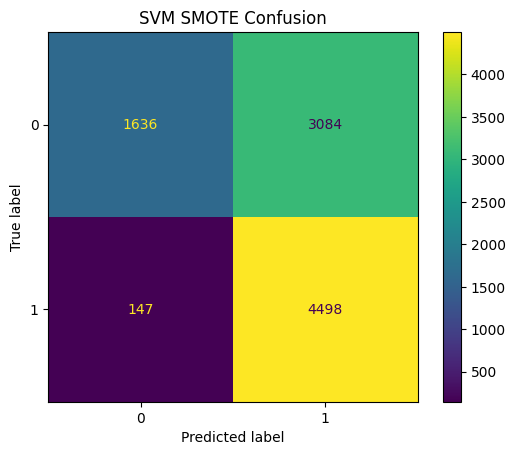

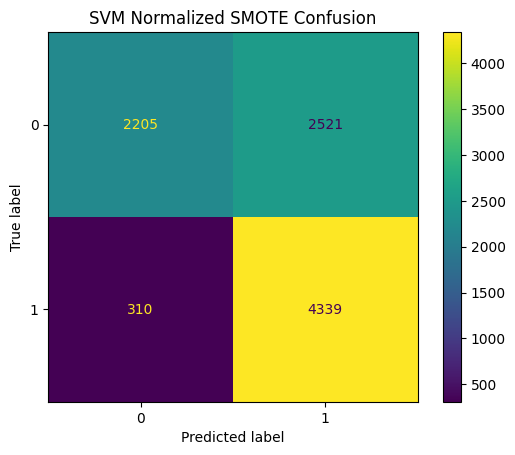

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("RF Confusion")
plt.show()

cmNorm = confusion_matrix(y_test, yNorm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNorm)
disp.plot()
plt.title("RF Normalized Confusion")
plt.show()

cmSMOTE = confusion_matrix(ySmote_test, ySMOTE_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmSMOTE)
disp.plot()
plt.title("RF SMOTE Confusion")
plt.show()

cmNormSMOTE = confusion_matrix(yNormSmote_test, yNormSMOTE_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNormSMOTE)
disp.plot()
plt.title("RF Norm SMOTE Confusion")
plt.show()

cmXGB = confusion_matrix(y_test, yXGB_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmXGB)
disp.plot()
plt.title("XGB Confusion")
plt.show()

cmNormXGB = confusion_matrix(yNorm_test, yNormXGB_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNormXGB)
disp.plot()
plt.title("XGB Normalized Confusion")
plt.show()

cmXGBSMOTE = confusion_matrix(ySmote_test, yXGBSMOTE_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmXGBSMOTE)
disp.plot()
plt.title("XGB SMOTE Confusion")
plt.show()

cmXGBNormSMOTE = confusion_matrix(yNormSmote_test, yXGBNormSMOTE_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmXGBNormSMOTE)
disp.plot()
plt.title("XGB Normalized SMOTE Confusion")
plt.show()

cmGB = confusion_matrix(y_test, yGB_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmGB)
disp.plot()
plt.title("GB Confusion")
plt.show()

cmNormGB = confusion_matrix(yNorm_test, yNormGB_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNormGB)
disp.plot()
plt.title("GB Normalized Confusion")
plt.show()

cmGBSMOTE = confusion_matrix(ySmote_test, yGBSMOTE_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmGBSMOTE)
disp.plot()
plt.title("GB SMOTE Confusion")
plt.show()

cmNormGBSMOTE = confusion_matrix(yNormSmote_test, yGBNormSMOTE_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNormGBSMOTE)
disp.plot()
plt.title("GB Normalized SMOTE Confusion")
plt.show()


cmNormSVM = confusion_matrix(yNorm_test, yNormSVM_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNormSVM)
disp.plot()
plt.title("SVM Confusion")
plt.show()

cmSVM = confusion_matrix(y_test, ySVM_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmSVM)
disp.plot()
plt.title("SVM Normalized Confusion")
plt.show()

cmSVMSMOTE = confusion_matrix(ySmote_test, ySVMSMOTE_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmSVMSMOTE)
disp.plot()
plt.title("SVM SMOTE Confusion")
plt.show()

cmNormSVMSMOTE = confusion_matrix(yNormSmote_test, yNormSmoteSVM_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNormSVMSMOTE)
disp.plot()
plt.title("SVM Normalized SMOTE Confusion")
plt.show()

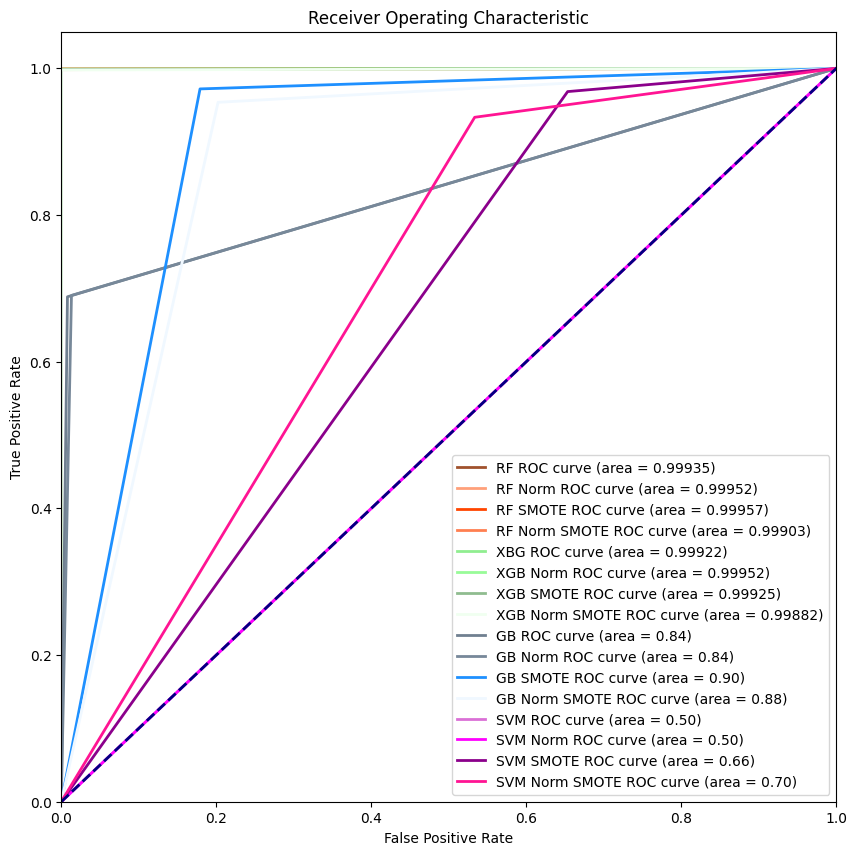

In [ ]:
# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
fprNorm, tprNorm, _ = roc_curve(yNorm_test, yNorm_pred)
roc_aucNorm = auc(fprNorm, tprNorm)
fprSMOTE, tprSMOTE, _ = roc_curve(ySmote_test, ySMOTE_pred)
roc_aucSMOTE = auc(fprSMOTE, tprSMOTE)
fprNormSMOTE, tprNormSMOTE, _ = roc_curve(yNormSmote_test, yNormSMOTE_pred)
roc_aucNormSMOTE = auc(fprNormSMOTE, tprNormSMOTE)

fprXGB, tprXGB, _ = roc_curve(y_test, yXGB_pred)
roc_aucXGB = auc(fprXGB, tprXGB)
fprXGBNorm, tprXGBNorm, _ = roc_curve(yNorm_test, yNormXGB_pred)
roc_aucXGBNorm = auc(fprXGBNorm, tprXGBNorm,)
fprXGBSMOTE, tprXGBSMOTE, _ = roc_curve(ySmote_test, yXGBSMOTE_pred)
roc_aucXGBSMOTE = auc(fprXGBSMOTE, tprXGBSMOTE)
fprNormXGBSMOTE, tprXGBNormSMOTE, _ = roc_curve(yNormSmote_test, yXGBNormSMOTE_pred)
roc_aucXGBNormSMOTE = auc(fprNormXGBSMOTE, tprXGBNormSMOTE)

fprGB, tprGB, _ = roc_curve(y_test, yGB_pred)
roc_aucGB = auc(fprGB, tprGB)
fprNormGB, tprNormGB, _ = roc_curve(yNorm_test, yNormGB_pred)
roc_aucGBNorm = auc(fprNormGB, tprNormGB)
fprGBSMOTE, tprGBSMOTE, _ = roc_curve(ySmote_test, yGBSMOTE_pred)
roc_aucGBSMOTE = auc(fprGBSMOTE, tprGBSMOTE)
fprGBNormSMOTE, tprGBNormSMOTE, _ = roc_curve(yNormSmote_test, yGBNormSMOTE_pred)
roc_aucGBNormSMOTE = auc(fprGBNormSMOTE, tprGBNormSMOTE)

fprSVM, tprSVM, _ = roc_curve(y_test, ySVM_pred)
roc_aucSVM = auc(fprSVM, tprSVM)
fprNormSVM, tprNormSVM, _ = roc_curve(yNorm_test, yNormSVM_pred)
roc_aucSVMNorm = auc(fprNormSVM, tprNormSVM)
fprSVMSMOTE, tprSVMSMOTE, _ = roc_curve(ySmote_test, ySVMSMOTE_pred)
roc_aucSVMSMOTE = auc(fprSVMSMOTE, tprSVMSMOTE)
fprSVMNormSMOTE, tprSVMNormSMOTE, _ = roc_curve(yNormSmote_test, yNormSmoteSVM_pred)
roc_aucSVMNormSMOTE = auc(fprSVMNormSMOTE, tprSVMNormSMOTE)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='sienna', lw=2, label=f'RF ROC curve (area = {roc_auc:.5f})')
plt.plot(fprNorm, tprNorm, color='lightsalmon', lw=2, label=f'RF Norm ROC curve (area = {roc_aucNorm:.5f})')
plt.plot(fprSMOTE, tprSMOTE, color='orangered', lw=2, label=f'RF SMOTE ROC curve (area = {roc_aucSMOTE:.5f})')
plt.plot(fprNormSMOTE, tprNormSMOTE, color='coral', lw=2, label=f'RF Norm SMOTE ROC curve (area = {roc_aucNormSMOTE:.5f})')

plt.plot(fprXGB, tprXGB, color='lightgreen', lw=2, label=f'XBG ROC curve (area = {roc_aucXGB:.5f})')
plt.plot(fprXGBNorm, tprXGBNorm, color='palegreen', lw=2, label=f'XGB Norm ROC curve (area = {roc_aucXGBNorm :.5f})')
plt.plot(fprXGBSMOTE, tprXGBSMOTE, color='darkseagreen', lw=2, label=f'XGB SMOTE ROC curve (area = {roc_aucXGBSMOTE :.5f})')
plt.plot(fprNormXGBSMOTE, tprXGBNormSMOTE, color='honeydew', lw=2, label=f'XGB Norm SMOTE ROC curve (area = {roc_aucXGBNormSMOTE:.5f})')

plt.plot(fprGB, tprGB, color='slategray', lw=2, label=f'GB ROC curve (area = {roc_aucGB:.2f})')
plt.plot(fprNormGB, tprNormGB, color='lightslategrey', lw=2, label=f'GB Norm ROC curve (area = {roc_aucGBNorm:.2f})')
plt.plot(fprGBSMOTE, tprGBSMOTE, color='dodgerblue', lw=2, label=f'GB SMOTE ROC curve (area = {roc_aucGBSMOTE:.2f})')
plt.plot(fprGBNormSMOTE, tprGBNormSMOTE, color='aliceblue', lw=2, label=f'GB Norm SMOTE ROC curve (area = {roc_aucGBNormSMOTE:.2f})')

plt.plot(fprSVM, tprSVM, color='orchid', lw=2, label=f'SVM ROC curve (area = {roc_aucSVM:.2f})')
plt.plot(fprNormSVM, tprNormSVM, color='magenta', lw=2, label=f'SVM Norm ROC curve (area = {roc_aucSVMNorm:.2f})')
plt.plot(fprSVMSMOTE, tprSVMSMOTE, color='darkmagenta', lw=2, label=f'SVM SMOTE ROC curve (area = {roc_aucSVMSMOTE:.2f})')
plt.plot(fprSVMNormSMOTE, tprSVMNormSMOTE, color='deeppink', lw=2, label=f'SVM Norm SMOTE ROC curve (area = {roc_aucSVMNormSMOTE:.2f})')

plt.plot([0, 2], [0, 2], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
'''
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)
    '''

'\nfrom sklearn.tree import export_graphviz\nfrom IPython.display import Image\nimport graphviz\n\nfor i in range(3):\n    tree = rf.estimators_[i]\n    dot_data = export_graphviz(tree,\n                               feature_names=X_train.columns,\n                               filled=True,\n                               max_depth=2,\n                               impurity=False,\n                               proportion=True)\n    graph = graphviz.Source(dot_data)\n    display(graph)\n    '